In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [4]:
data = pd.read_csv('/content/drive/MyDrive/FDM Data Set - Telecommunication/expanded_hotel_bookings.csv')

In [5]:
# Descriptive statistic on dataset on numerical columns
data[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'required_car_parking_space', 'lead_time',
    'arrival_year', 'arrival_month', 'arrival_date',
    'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
    'avg_price_per_room', 'no_of_special_requests']].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,50000.0,1.999840,0.816023,1.0,1.00,2.00,3.00,3.0
no_of_children,50000.0,1.002960,0.816287,0.0,0.00,1.00,2.00,2.0
no_of_weekend_nights,45434.0,1.002333,0.815783,0.0,0.00,1.00,2.00,2.0
no_of_week_nights,50000.0,2.493240,1.706790,0.0,1.00,2.00,4.00,5.0
required_car_parking_space,50000.0,0.498960,0.500004,0.0,0.00,0.00,1.00,1.0
lead_time,45466.0,182.703163,104.720953,0.0,93.00,183.00,273.00,364.0
arrival_year,50000.0,2018.501120,0.500004,2018.0,2018.00,2019.00,2019.00,2019.0
arrival_month,50000.0,6.518200,3.453553,1.0,4.00,7.00,10.00,12.0
arrival_date,50000.0,14.556160,8.077950,1.0,8.00,15.00,22.00,28.0
repeated_guest,50000.0,0.501100,0.500004,0.0,0.00,1.00,1.00,1.0


In [6]:
# prompt: check for duplicate values in this datset

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
if not duplicate_rows.empty:
  print("Duplicate rows:\n", duplicate_rows)


Number of duplicate rows: 0


In [7]:
data = data.drop('Booking_ID', axis=1)

In [8]:
# prompt: check for null values in this data set and print the number of null values in each column

# Check for null values
null_counts = data.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                    4566
no_of_week_nights                          0
lead_time                               4534
arrival_year                               0
arrival_month                              0
arrival_date                               0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                      4625
no_of_special_requests                     0
required_car_parking_space                 0
repeated_guest                             0
room_type_reserved                         0
type_of_meal_plan                          0
market_segment_type                        0
booking_status                             0
dtype: int64


In [9]:
# Fill missing values for 'lead_time', 'avg_price_per_room', and 'no_of_weekend_nights' using mean or median
data['lead_time'].fillna(data['lead_time'].median(), inplace=True)
data['avg_price_per_room'].fillna(data['avg_price_per_room'].mean(), inplace=True)
data['no_of_weekend_nights'].fillna(data['no_of_weekend_nights'].median(), inplace=True)

# Check if nulls are handled
print(data.isnull().sum())

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
required_car_parking_space              0
repeated_guest                          0
room_type_reserved                      0
type_of_meal_plan                       0
market_segment_type                     0
booking_status                          0
dtype: int64


<ipython-input-9-07e754794290>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['lead_time'].fillna(data['lead_time'].median(), inplace=True)
<ipython-input-9-07e754794290>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [10]:
# Class balance for booking status
booking_status_counts = data['booking_status'].value_counts()
print("\nClass Balance for Booking Status:\n", booking_status_counts)
print("\nPercentage of each class:\n", booking_status_counts / len(data) * 100)



Class Balance for Booking Status:
 booking_status
Not_Canceled    25156
Canceled        24844
Name: count, dtype: int64

Percentage of each class:
 booking_status
Not_Canceled    50.312
Canceled        49.688
Name: count, dtype: float64


In [ ]:
# Dictionaries to store encoding and decoding maps
encoding_maps = {}
decoding_maps = {}

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

    # Create encoding map
    encoding_map = {original: encoded for original, encoded in zip(label_encoders[column].classes_, label_encoders[column].transform(label_encoders[column].classes_))}
    encoding_maps[column] = encoding_map

    # Create decoding map
    decoding_map = {encoded: original for original, encoded in encoding_map.items()}
    decoding_maps[column] = decoding_map

In [ ]:
# Print the encoding and decoding maps
print("Encoding Maps:")
encoding_maps
print("\nDecoding Maps:")
decoding_maps

Encoding Maps:

Decoding Maps:


{'type_of_meal_plan': {0: 'Meal Plan 1', 1: 'Meal Plan 2', 2: 'Not Selected'},
 'room_type_reserved': {0: 'Room_Type_1', 1: 'Room_Type_2', 2: 'Room_Type_3'},
 'market_segment_type': {0: 'Corporate', 1: 'Offline', 2: 'Online'},
 'booking_status': {0: 'Canceled', 1: 'Not_Canceled'}}

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
# Define columns for normalization
normalize_columns = ['lead_time', 'avg_price_per_room']

# Define columns for standardization
standardize_columns = ['no_of_week_nights', 'no_of_weekend_nights',
                       'no_of_previous_bookings_not_canceled', 'no_of_special_requests']

# Apply normalization
min_max_scaler = MinMaxScaler()
data[normalize_columns] = min_max_scaler.fit_transform(data[normalize_columns])

# Apply standardization
standard_scaler = StandardScaler()
data[standardize_columns] = standard_scaler.fit_transform(data[standardize_columns])

In [ ]:
# Check the range of normalized columns
print("Range of normalized columns:")
print(data[['lead_time', 'avg_price_per_room']].min())
print(data[['lead_time', 'avg_price_per_room']].max())

Range of normalized columns:
lead_time             0.0
avg_price_per_room    0.0
dtype: float64
lead_time             1.0
avg_price_per_room    1.0
dtype: float64


In [ ]:
# Check the mean and standard deviation of standardized columns
print("Mean and Standard Deviation of standardized columns:")
print(data[['no_of_week_nights', 'no_of_weekend_nights',
        'no_of_previous_bookings_not_canceled', 'no_of_special_requests']].mean())
print(data[['no_of_week_nights', 'no_of_weekend_nights',
        'no_of_previous_bookings_not_canceled', 'no_of_special_requests']].std())

Mean and Standard Deviation of standardized columns:
no_of_week_nights                      -9.791279e-17
no_of_weekend_nights                    1.380585e-16
no_of_previous_bookings_not_canceled    4.725109e-17
no_of_special_requests                 -2.966516e-17
dtype: float64
no_of_week_nights                       1.00001
no_of_weekend_nights                    1.00001
no_of_previous_bookings_not_canceled    1.00001
no_of_special_requests                  1.00001
dtype: float64


In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print(correlation_matrix)

                                      no_of_adults  no_of_children  \
no_of_adults                              1.000000        0.001502   
no_of_children                            0.001502        1.000000   
no_of_weekend_nights                     -0.002017        0.004527   
no_of_week_nights                         0.002426        0.002369   
lead_time                                 0.002500        0.001485   
arrival_year                              0.003236        0.004843   
arrival_month                            -0.000971       -0.003574   
arrival_date                             -0.000751        0.003681   
no_of_previous_cancellations             -0.001373       -0.005965   
no_of_previous_bookings_not_canceled     -0.000389        0.002898   
avg_price_per_room                        0.000060        0.003456   
no_of_special_requests                   -0.002642        0.001550   
required_car_parking_space               -0.007598       -0.002149   
repeated_guest      

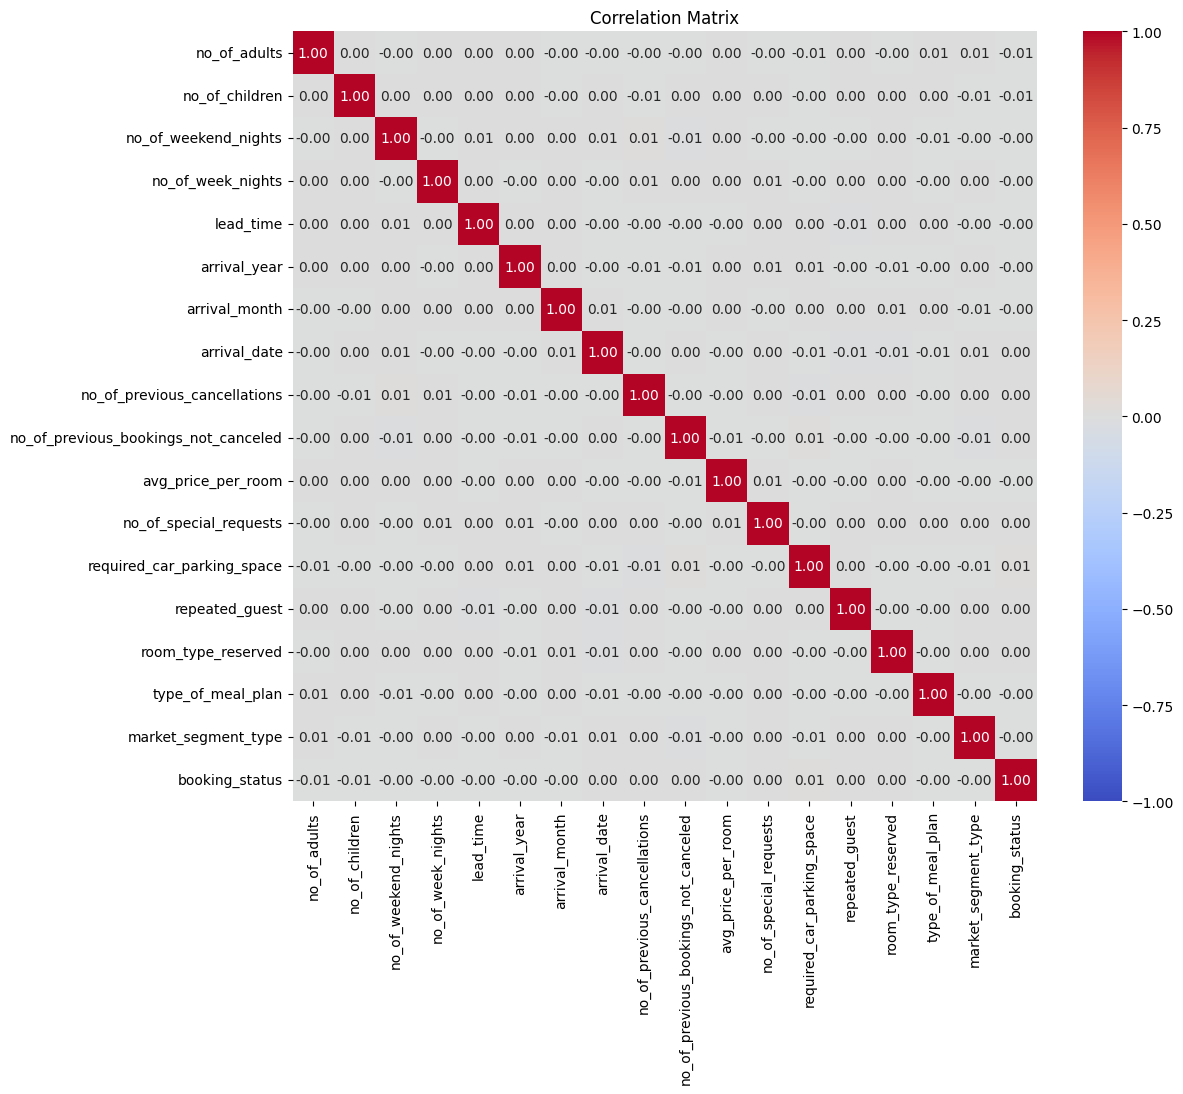

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Define features and target
X = data.drop(columns=['booking_status'])
y = data['booking_status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **[Decision Tree Algorithm]**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# 2. Train the model on the training data
clf.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = clf.predict(X_test)

clf.fit(X_train, y_train)

# 4. Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 49.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      4975
           1       0.50      0.50      0.50      5025

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000

Confusion Matrix:
[[2425 2550]
 [2519 2506]]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],            # Experiment with different depths or no depth limit
    'min_samples_split': [2, 10, 20],              # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],                # Minimum samples at a leaf node
    'criterion': ['gini', 'entropy']               # Gini Impurity or Information Gain (Entropy)
}

# Initialize the Decision Tree Classifier
clf_best = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score * 100:.2f}%")

# Train a new Decision Tree with the best parameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions and evaluate the final model
y_pred = best_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best params: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 50.36%
Test Accuracy with best params: 49.41%
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.51      0.50      4975
           1       0.50      0.47      0.49      5025

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000

Confusion Matrix:
[[2555 2420]
 [2639 2386]]


# **LOGISTIC REGRESSION ALGORITHM**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Hyperparameters for Logistic Regression
param_grid_logreg = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

# Create GridSearchCV for Logistic Regression
grid_search_logreg = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000),
                                  param_grid=param_grid_logreg,
                                  cv=5,
                                  n_jobs=-1,
                                  verbose=2)

# Fit the model
grid_search_logreg.fit(X_train, y_train)
best_logreg = grid_search_logreg.best_estimator_

# Make predictions and evaluate
y_pred_logreg = best_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logreg))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Logistic Regression Accuracy: 0.5015
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.50      0.34      0.40      4975
           1       0.50      0.67      0.57      5025

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.50      0.50      0.49     10000



# **k-NEAREST NEIGHBORS (k-NN) ALGORITHM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameters for k-NN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create GridSearchCV for k-NN
grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               cv=5,
                               n_jobs=-1,
                               verbose=2)

# Fit the model
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_

# Make predictions and evaluate
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn}")
print("Classification Report (k-NN):")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
k-NN Accuracy: 0.4939
Classification Report (k-NN):
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      4975
           1       0.50      0.50      0.50      5025

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.49      0.49      0.49     10000



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Accuracy: 0.4999
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49      4975
           1       0.50      0.52      0.51      5025

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000

